# Lending Club Case Study

### CRISP-DM Framework

#### For our analysis of this case study we will be following the CRISP-DM Framework

##### CRISP-DM breaks the process of data mining into six major phases:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

##### If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

##### If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who __default__ cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the __driving factors (or driver variables)__ behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Data Understanding

- The data is provided in a csv file names __loan.csv__. It contains the complete loan data for all loans issued through the time period __2007 to 2011__.

- In addition to this we have been provided with data dictionary file which describes the meaning of all the variables in the load data set.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from loan.csv & check the column details
# Encoding = "ISO-8859-1" is being used as a learning from the previous Investment Analysis Case Study
data = pd.read_csv('loan.csv', encoding = "ISO-8859-1", low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check the shape of the data set
data.shape

(39717, 111)

In [5]:
# Skim through the top 5 records of the rounds2 dataframe
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning - I

There are almost 40k rows and more than 100 columns. We will try to reduce the number of columns on basis of missing values and domain knowledge.

In [6]:
# Check for null values in each column
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Check for null values percentage in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
# List only the columns with null values and the corresponding percentage
round(100*(data.isnull().sum()/len(data.index)), 2).loc[round(100*(data.isnull().sum()/len(data.index)), 2)>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

### Columns with null values

There are quite a few columns which do not have any value at all. The columns having more than 30% of null values do not help in further data analysis. Droping the entire rows where values are null for these columns, would lead to losing data from other columns which could be meaningful. Hence let us drop all the columns where null values are greater than 30% and then further analyse the remaining columns.

In [9]:
# Find the number columns where null values are greater than 30%
null_columns = list (round(100*(data.isnull().sum()/len(data.index)), 2).
                     loc[round(100*(data.isnull().sum()/len(data.index)), 2)>30].index)
len(null_columns)

58

In [10]:
# Drop columns having more than 30% of null or missing values
data = data.drop(null_columns,axis=1)
data.shape

(39717, 53)

In [11]:
# Let us have a look at the columns present now in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### Identify the required columns

Certainly there are quite a few columns which are not required for the further analysis. Out of the 53 columns left out, let us list down the columns which we think might be required for further analysis. Let us drop the other columns which are not required for further analysis.


In [12]:
# Let us take a look at the number of unique values in each column
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [13]:
# Droping columns that have only 1 unique value. These columns are of no use to us
unique_cols=data.columns[data.nunique()==1]
data.drop(columns=unique_cols,inplace=True)

In [14]:
# We have some customer behaviour variables. These variables are not at all important to us for finding predictors for default loans.
# We will also be removing some columns which won't be of any help in analysis.
cols=['url','zip_code','last_pymnt_amnt','last_pymnt_d','last_credit_pull_d','collection_recovery_fee','recoveries',
              'total_rec_int','total_rec_late_fee','total_rec_prncp','total_pymnt','total_pymnt_inv','out_prncp',
              'out_prncp_inv','member_id','last_credit_pull_d','revol_bal','revol_util', 'title']
data.drop(cols,axis=1,inplace=True)
data.shape

(39717, 26)

In [15]:
# Let us now take a look at the number of unique values in each column
data.nunique().sort_values()

term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
pub_rec                     5
home_ownership              5
grade                       7
inq_last_6mths              9
delinq_2yrs                11
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
total_acc                  82
int_rate                  371
earliest_cr_line          526
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
emp_title               28820
id                      39717
dtype: int64

### Data Cleaning - II

Now that we have a concise list of columns which we are required for analysis, let us now look at the values of each column and 'clean' them if required.

#### Loan Status

In [16]:
# This is an important column which is required for the analysis. Let us first take a look at this.
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
# Loan status Current is of no use to us. Therefore we will remove these enteries
data=data[~(data.loan_status=='Current')]
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [18]:
# For ease of analysis let us convert this to 0 & 1 and store in a separate column
data['loan_stat']=data.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)
data.loan_stat.value_counts()

0    32950
1     5627
Name: loan_stat, dtype: int64

#### Term

In [19]:
# Strip the month text in the term column
data['term']=data.term.str.replace(' months',"").str.strip()
data.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

#### Interest Rate

In [20]:
# Strip the % sign from the Interest Rate for ease of analysis
data['int_rate']=data.int_rate.str.replace('%','').str.strip().astype('float')

#### Employee Title

In [21]:
print(data.emp_title.isnull().sum())
print(data.emp_title.nunique())

2386
28027


In [22]:
# We can not make any insight from employee title but we can see if the borrower discloses his employer details or not ?
data['emp_title']=data.emp_title.apply(lambda x : 'Not Disclosed' if np.nan_to_num(x)==0 else 'Disclosed')
data.emp_title.value_counts()

Disclosed        36191
Not Disclosed     2386
Name: emp_title, dtype: int64

#### Employee Length

In [23]:
# We will clean the column and replace missing values with not disclosed
data.emp_length=data.emp_length.str.replace(' years','').str.replace(' year','').str.replace('< 1','1').str.replace('+','')
data.emp_length.fillna('Not Disclosed',inplace=True)
data.emp_length.value_counts()

10               8488
1                7677
2                4291
3                4012
4                3342
5                3194
6                2168
7                1711
8                1435
9                1226
Not Disclosed    1033
Name: emp_length, dtype: int64

#### Home Ownership

In [24]:
# Let us see the current home ownership value
data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [25]:
# According to data description there are only 4 kinds of home ownership.Therefore we will remove 'NONE'.
data=data[~(data.home_ownership=='NONE')]
data.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

#### Issue Date

In [26]:
# Let us correct the date format
data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')

#### Earliest Credit Line

In [27]:
# Let us correct the date format & correct the future dates
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data.earliest_cr_line=data.earliest_cr_line.apply(lambda x: x.year-100 if x.year>2020 else x.year)

#### Public record bankruptcies

In [28]:
# Let us see the current value
data.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [29]:
# We will impute missing values with most occuring value - 0
data.pub_rec_bankruptcies.fillna(0,inplace=True)
data.pub_rec_bankruptcies.value_counts()

0.0    36932
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

## UNIVARIATE ANALYSIS

In [30]:
def default_rate(col,title):
    sns.barplot(x=col,y='loan_stat',data=data)
    plt.ylabel('Default Rate')
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.show()
    
def stack_plot(col):
    df.plot(x=col,y=[1,0],kind='bar',stacked=True,figsize=(10,7))
    df_total = df[1] + df[0] 
    df_rel = df[df.columns[1:]].div(df_total, 0) * 100
  
    for n in df_rel: 
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, [2,1]].cumsum(1)[n],  
                                         df[n], df_rel[n])): 
            plt.text(i,cs-ab/2, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center' )
    plt.legend(loc='best')

### Loan Amount

In [31]:
sns.set_style('darkgrid')

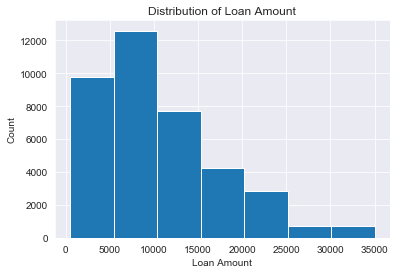

In [32]:
plt.hist(data.loan_amnt,bins=7)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

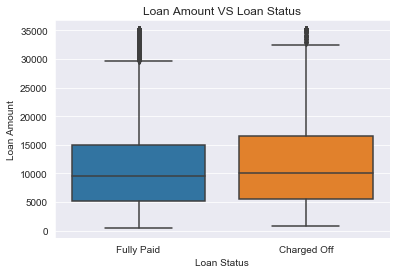

In [33]:
sns.boxplot(x='loan_status',y='loan_amnt',data=data)
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title('Loan Amount VS Loan Status')
plt.show()

In [34]:
def loan(x):
    if x<=5000:
        return 'low'
    elif x<=10000:
        return 'medium'
    elif x<=25000:
        return 'high'
    else :
        return 'very high'

data['loan_amnt_bucket']=data.loan_amnt.apply(lambda x:loan(x))

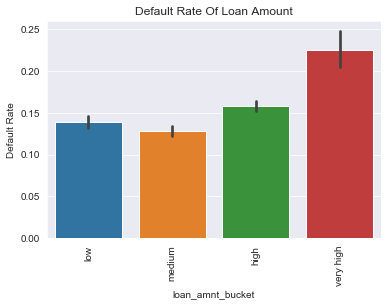

In [35]:
default_rate(col='loan_amnt_bucket',title='Default Rate Of Loan Amount')

#### Observation :
Highest amount of loan applied is between 5000 to 10000 followed by 0 to 5000 and 10000 to 15000.  
As the loan amount increases the percentage of charged off loans also increases.  
Therefore higher is the loan amount higher is default rate.

### Funded amount


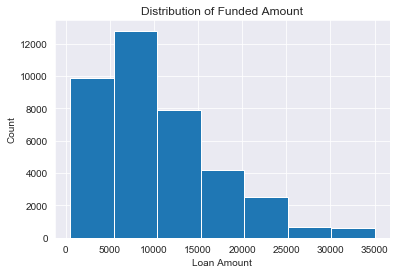

In [36]:
plt.hist(data.funded_amnt,bins=7)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Funded Amount')
plt.show()

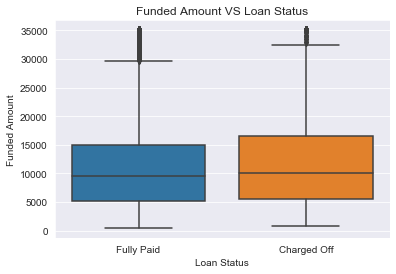

In [37]:
sns.set_style('darkgrid')
sns.boxplot(x='loan_status',y='loan_amnt',data=data)
plt.ylabel('Funded Amount')
plt.xlabel('Loan Status')
plt.title('Funded Amount VS Loan Status')
plt.show()

In [38]:
def loan_funded(x):
    if x<=5000:
        return 'low'
    elif x<=10000:
        return 'medium'
    elif x<=25000:
        return 'high'
    else :
        return 'very high'

data['funded_amnt_bucket']=data.funded_amnt.apply(lambda x:loan_funded(x))

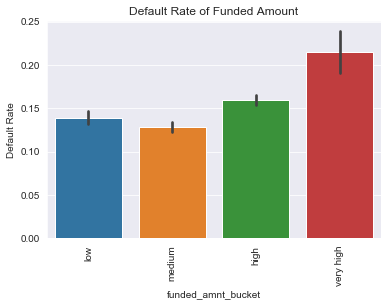

In [39]:
default_rate('funded_amnt_bucket','Default Rate of Funded Amount')

#### Observation :
Funded amount has similar trend as loan amount.

### Term

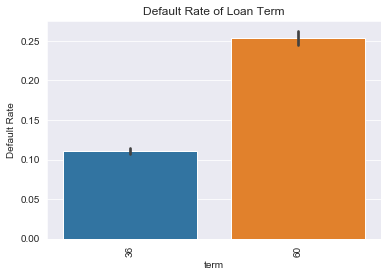

In [40]:
default_rate('term','Default Rate of Loan Term')

In [41]:
df=pd.pivot_table(data=data,values='id',index='term',columns='loan_stat',aggfunc='count')
df.reset_index(inplace=True)

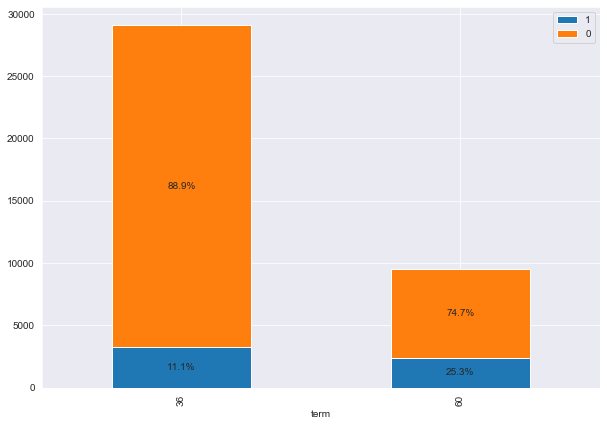

In [42]:
stack_plot('term')

#### Observation :
Percentage of Charged Off loans is higher when loan tenure is high. People who are opting for 60 months term has higher chances of defaulting the laon.

### Interest Rate

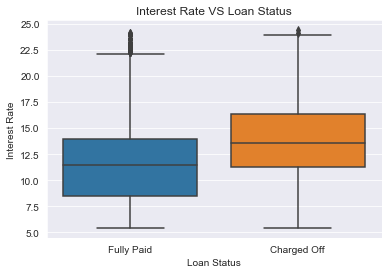

In [43]:
sns.boxplot(x='loan_status',y='int_rate',data=data)
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.title('Interest Rate VS Loan Status')
plt.show()

In [44]:
def int(x):
    if x<=10:
        return 'low'
    elif x<=15:
        return 'medium'
    else :
        return 'very high'

data['int_rate_bucket']=data.int_rate.apply(lambda x:int(x))

In [45]:
df=pd.pivot_table(data=data,index='int_rate_bucket',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)

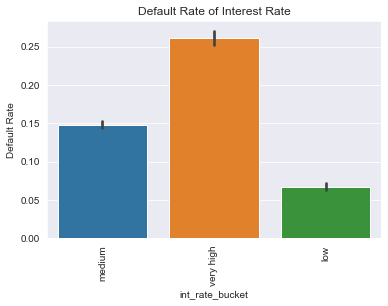

In [46]:
default_rate('int_rate_bucket','Default Rate of Interest Rate')

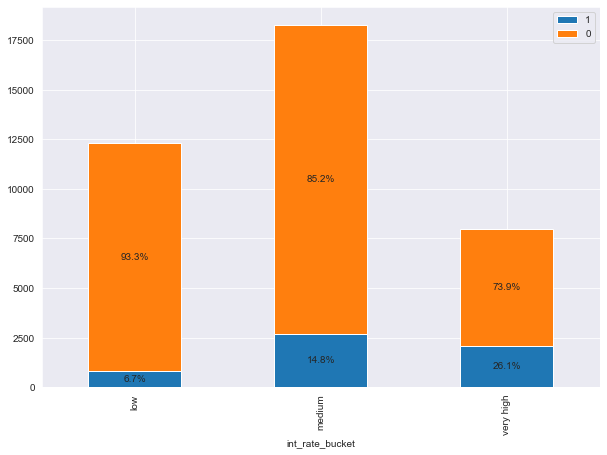

In [47]:
stack_plot('int_rate_bucket')

#### Observation :
As the interest rate increases percentage of Charged Off loans also increases.  
This means people who take loan on higher interest rates are most likely to default.

### Installment

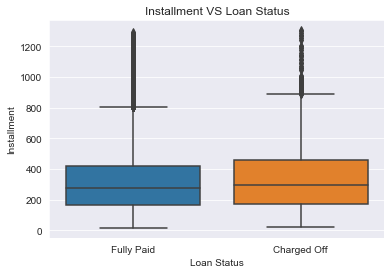

In [48]:
sns.boxplot(x='loan_status',y='installment',data=data)
plt.ylabel('Installment')
plt.xlabel('Loan Status')
plt.title('Installment VS Loan Status')
plt.show()

In [49]:
data['installment_bucket']=pd.cut(data.installment,np.linspace(0,1400,8))


In [50]:
df=pd.pivot_table(data=data,values='id',index='installment_bucket',columns='loan_stat',aggfunc='count')
df.reset_index(inplace=True)

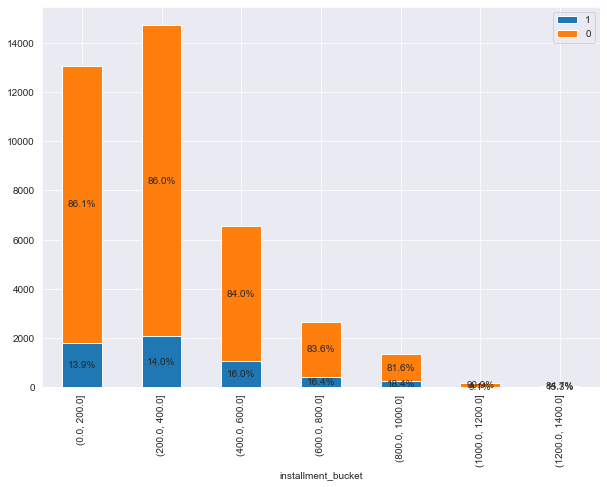

In [51]:
stack_plot('installment_bucket')

#### Observation :
As the installment increases percentage of default loans also increases.

### Employee title

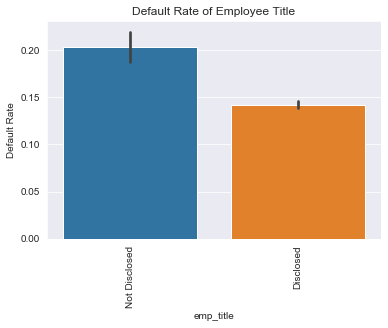

In [52]:
default_rate('emp_title','Default Rate of Employee Title')

In [53]:
df=pd.pivot_table(data=data,index='emp_title',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)

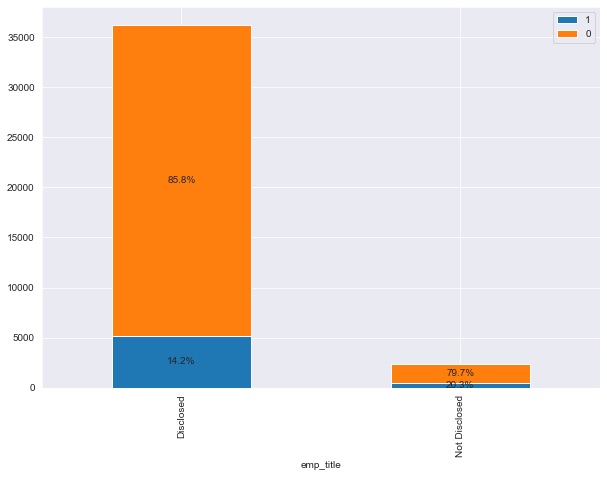

In [54]:
stack_plot('emp_title')

#### Observation :
Most of borrowers discloses their employee title but default rate is higher for people who doesn't discloses title.

### Employee length

In [55]:
data.emp_length=data.emp_length.astype('category')

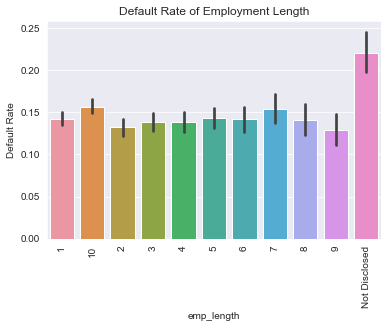

In [56]:
default_rate('emp_length','Default Rate of Employment Length')

In [57]:
df=pd.pivot_table(data=data,index='emp_length',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)

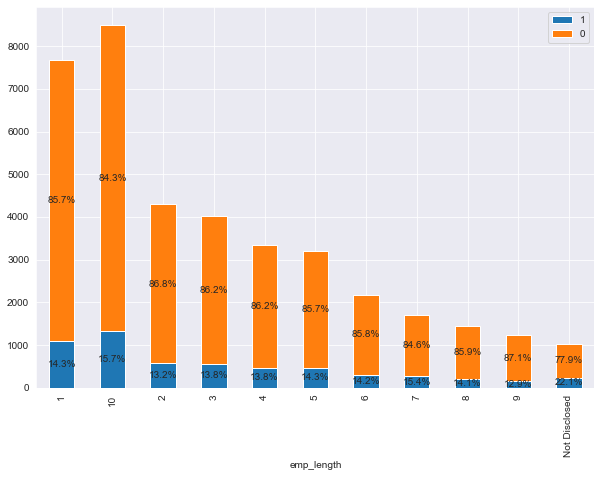

In [58]:
stack_plot('emp_length')

#### Observation:
People who have not disclosed their employment length has highest default rate.  
For rest no particular trend can be seen.

### Home Ownership

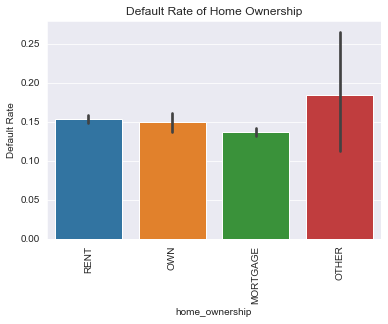

In [61]:
default_rate('home_ownership','Default Rate of Home Ownership')

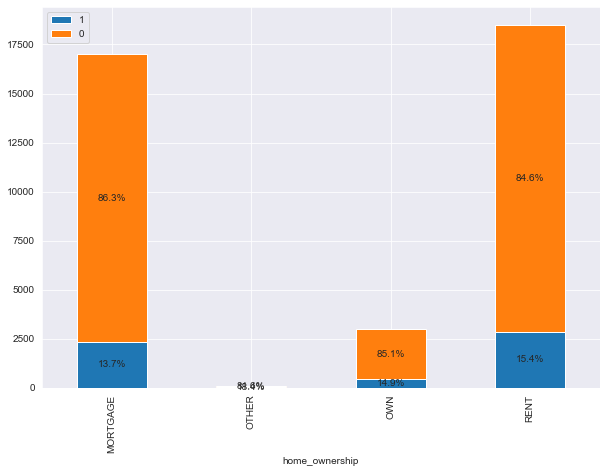

In [60]:
df=pd.pivot_table(data=data,index='home_ownership',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)
stack_plot('home_ownership')


#### Observation:
People with home ownership of 'OTHER' has highest default rate.  
Default Rate for 'Rent' is higher than 'Mortgage'.

### Annual Income

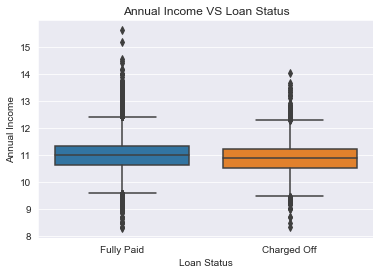

In [62]:
# Since there is a lot of variation in annual income , therefore we transform annual income using log
sns.boxplot(x=data.loan_status,y=np.log(data.annual_inc))
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title('Annual Income VS Loan Status')
plt.show()

In [63]:
def income(x):
    if x <=50000:
        return 'low'
    elif x<=100000:
        return 'medium'
    elif x<=200000:
        return 'high'
    else:
        return 'very high'

In [64]:
data['annual_inc_bucket']=data.annual_inc.apply(income)

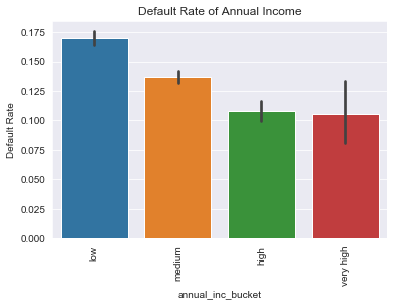

In [66]:
default_rate('annual_inc_bucket','Default Rate of Annual Income')

In [67]:
df=pd.pivot_table(data=data,index='annual_inc_bucket',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)

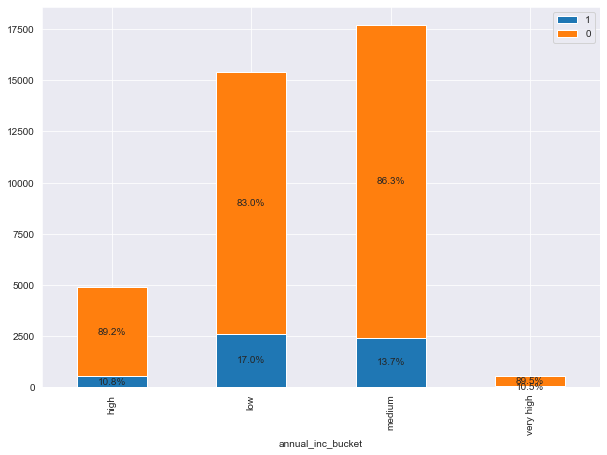

In [68]:
stack_plot('annual_inc_bucket')

#### Observation:
People with low income has highest percentage of charged off loans.  
Higher the annual income lower is the default rate.  


### Verification Status

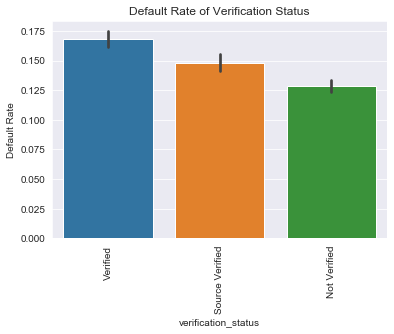

In [169]:
default_rate('verification_status','Default Rate of Verification Status')

In [170]:
df=pd.pivot_table(data=data,index='verification_status',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)

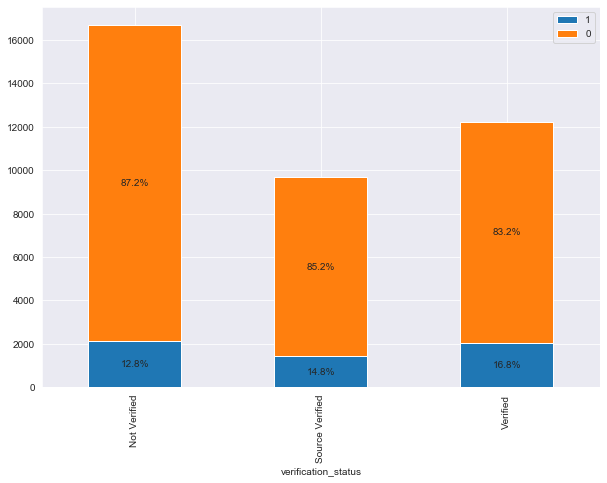

In [171]:
stack_plot('verification_status')

#### Observation :
We were expecting that people who are not verified will have highest default rate. But surprisingly people who are verified have highest default rate.  
Therefore we would need to do some more analysis on verification status.

### Issue Date

In [173]:
data['year']=data.issue_d.apply(lambda x:x.year)
data['month']=data.issue_d.apply(lambda x: x.month)

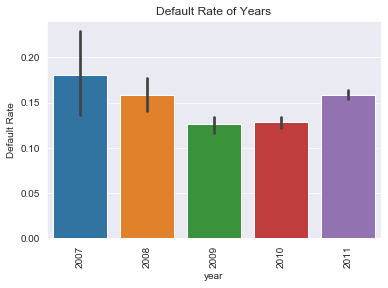

In [175]:
default_rate('year','Default Rate of Years')

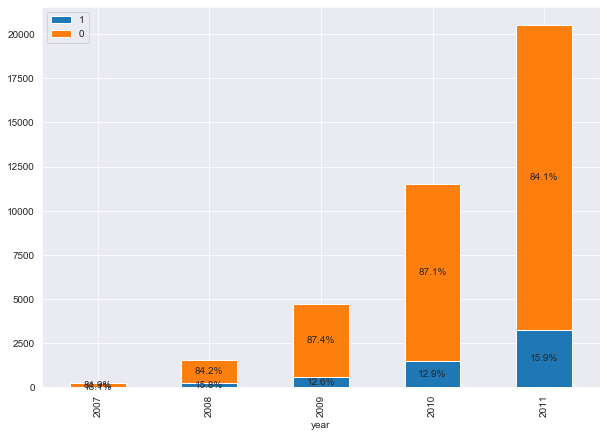

In [178]:
df=pd.pivot_table(data=data,index='year',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)
stack_plot('year')

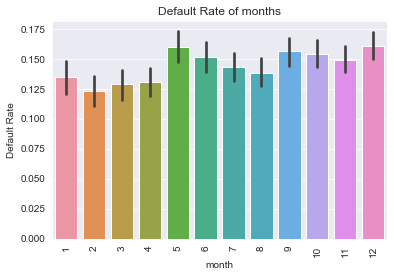

In [176]:
default_rate('month','Default Rate of months')

#### Observation :
Number of loans issued is increasing from 2007.  
From 2007 we can see a declining trend in default rate but in 2011 the default rate increases again.

### Purpose

In [179]:
# purpose - home_improvement and moving comes under same category.
data[(data.purpose=='home_improvement') | (data.purpose=='moving')]['purpose']='house'

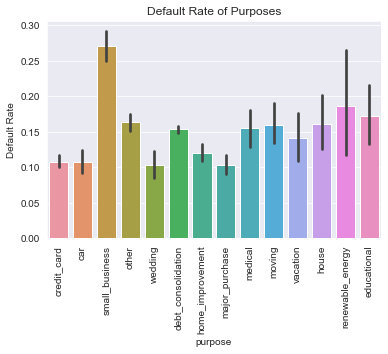

In [180]:
default_rate('purpose','Default Rate of Purposes')

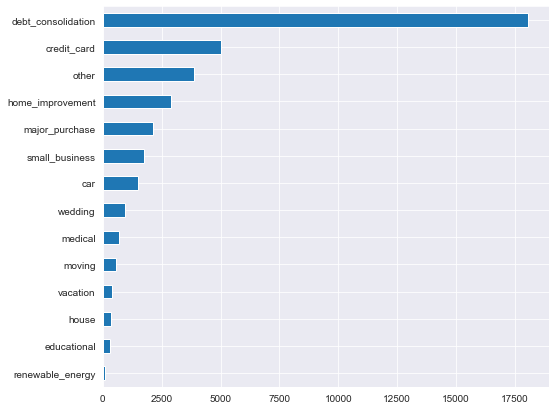

In [190]:
data.purpose.value_counts().sort_values().plot.barh(figsize=(8,7))

#### Observations:
Debt consolidation and credit card are main purposes for taking loan.  
Other major purposes includes - other,home_improvement,major_purchases and small_business.  
Out of all the purposes small_business has highest default rate

### Dti

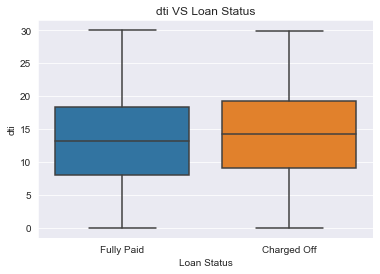

In [69]:
sns.boxplot(x='loan_status',y='dti',data=data)
plt.ylabel('dti')
plt.xlabel('Loan Status')
plt.title('dti VS Loan Status')
plt.show()

In [70]:
def dti(x):
    if x<=10:
        return 'low'
    elif x<=20:
        return 'medium'
    else :
        return 'high'

data['dti_bucket']=data.dti.apply(dti)

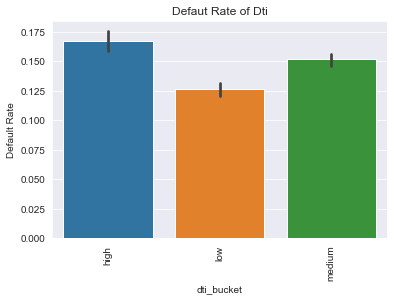

In [71]:
default_rate('dti_bucket','Defaut Rate of Dti')

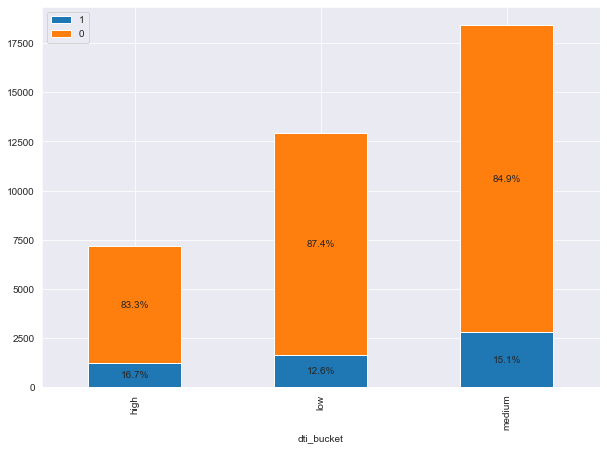

In [72]:
df=pd.pivot_table(data=data,index='dti_bucket',columns='loan_stat',values='id',aggfunc='count')
df.reset_index(inplace=True)
stack_plot('dti_bucket')

#### Observation:
Highest number of people have medium dti followed by low and high dti.  
A very clear trend can be seen between dti and default rate : higher dti , higher is the default rate.

### Delinquency

In [118]:
def delinq(x):
    if x<=1:
        return 'Low'
    elif x<=3:
        return 'Medium'
    else :
        return 'High'

In [119]:
data['delinq_2yrs_bucket']=data.delinq_2yrs.apply(delinq)

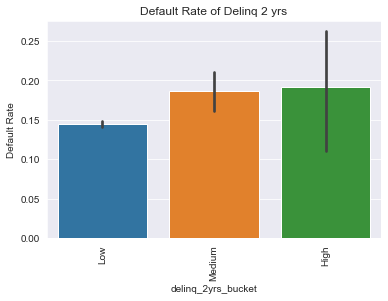

In [120]:
default_rate('delinq_2yrs_bucket','Default Rate of Delinq 2 yrs')

#### Observations:
People with Low Delinq 2 yrs has least default rate.  
People with Medium and High Delinq 2 yrs has almost same default rate.

### Inq_last_6mths

In [77]:
def inq(x):
    if x<=2:
        return 'Low'
    elif x<=6:
        return 'Medium'
    else:
        return 'High'
data.inq_last_6mths_bucket=data.inq_last_6mths.apply(inq)

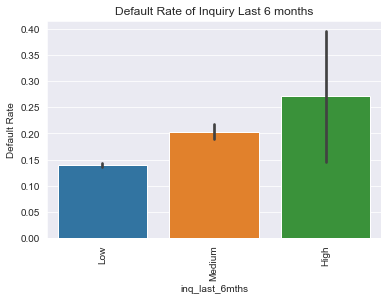

In [78]:
default_rate(data.inq_last_6mths_bucket,'Default Rate of Inquiry Last 6 months')

#### Observation :
There is a clear trend between inquiry in last 6 months and default rate.  
Person inquiring more in last 6 months has higher default rate.

### Open Acc

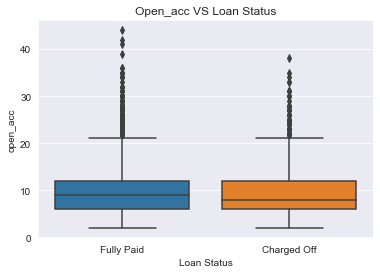

In [79]:
sns.boxplot(x='loan_status',y='open_acc',data=data)
plt.ylabel('open_acc')
plt.xlabel('Loan Status')
plt.title('Open_acc VS Loan Status')
plt.show()

In [80]:
data['open_acc_bucket']=pd.cut(data.open_acc,np.linspace(0,45,10))

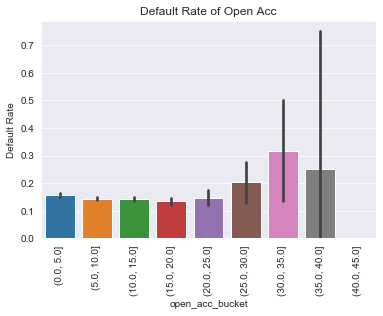

In [81]:
default_rate('open_acc_bucket','Default Rate of Open Acc')

#### Observations:
We can see that all lower open_acc has almost same default rate.  
Open_acc in range of 25 to 35 has highest default rate.

### Total Acc

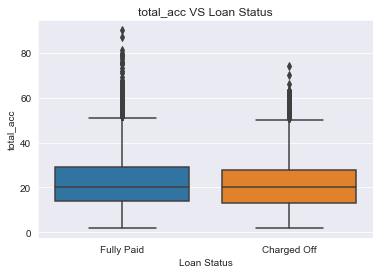

In [82]:
sns.boxplot(x='loan_status',y='total_acc',data=data)
plt.ylabel('total_acc')
plt.xlabel('Loan Status')
plt.title('total_acc VS Loan Status')
plt.show()

#### Observation:
Total_acc follows similar trend as open_acc.

### Pub_rec

In [83]:
data.pub_rec.value_counts()

0    36504
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

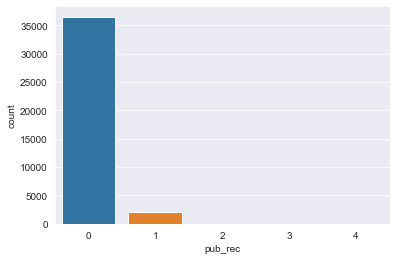

In [84]:
sns.countplot(data.pub_rec)
plt.show()

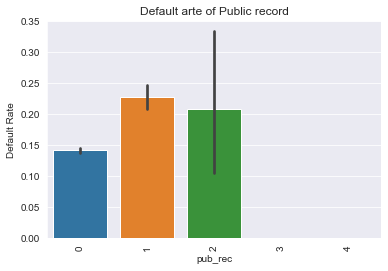

In [85]:
default_rate('pub_rec','Default arte of Public record')

#### Observation:
Most of people have 0 derogatory public records. Very few people have more than 2 records.  
People with 0 records has least default rate.

### Pub_rec_bankruptcy

In [86]:
data.pub_rec_bankruptcies.value_counts()

0.0    36932
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

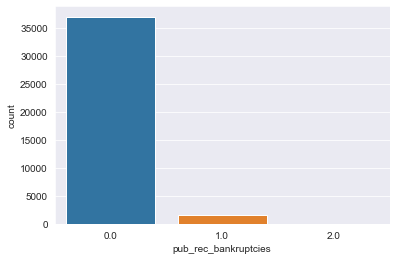

In [87]:
sns.countplot(data.pub_rec_bankruptcies)
plt.show()

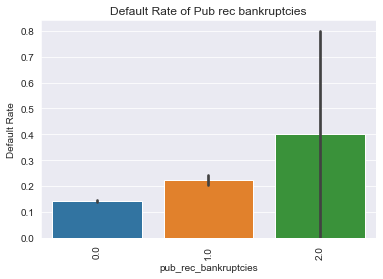

In [88]:
default_rate('pub_rec_bankruptcies','Default Rate of Pub rec bankruptcies')

#### Observation:
Most people have 0 bankruptcy records followed by 1 record. Very few people have 2 records.  
We can clearly see that as bankruptcy records increase default rate also increases.

### Grade 

In [89]:
data.grade.value_counts()

B    11673
A    10044
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

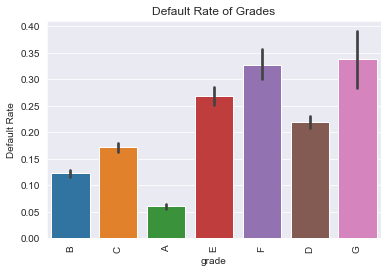

In [90]:
default_rate('grade','Default Rate of Grades')

#### Observations:
we can clearly see that higher the grade higher is the default rate.  
Grades are directly linked to interest rate. Higher grades are assigned higher interest rate.
People borrowing at higher interest rates has high default rate.

### Sub Grade

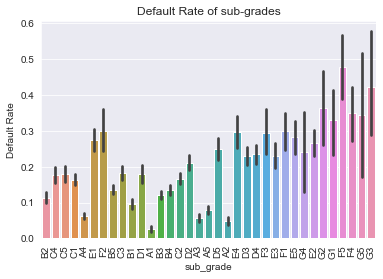

In [91]:
default_rate('sub_grade','Default Rate of sub-grades')

In [92]:
data.groupby(['grade','sub_grade'])['int_rate'].mean()

grade  sub_grade
A      A1            5.805224
       A2            6.378733
       A3            7.164229
       A4            7.660428
       A5            8.262302
B      B1           10.005651
       B2           10.486097
       B3           10.981062
       B4           11.393268
       B5           11.766421
C      C1           12.835839
       C2           13.328498
       C3           13.638320
       C4           14.026086
       C5           14.469402
D      D1           14.853169
       D2           15.300202
       D3           15.714937
       D4           16.086536
       D5           16.580276
E      E1           16.943199
       E2           17.356889
       E3           17.722965
       E4           18.182358
       E5           18.618010
F      F1           19.085738
       F2           19.284077
       F3           19.945402
       F4           20.206358
       F5           20.673009
G      G1           20.960745
       G2           21.039221
       G3           21.

#### Observation :
Each grade has further sub grades which has interest rate in increasing order.  
Therefore it also has same trend as grades.  
Higher sub-grades means higher default rate.

### Bivariate Analysis

#### Loan_amnt vs time vs loan_status

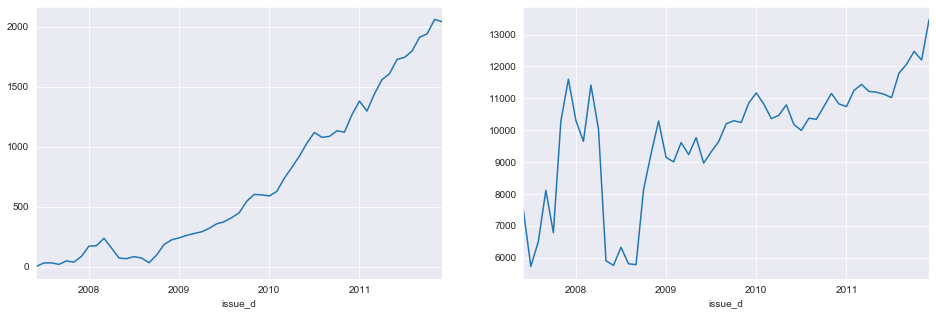

In [93]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
data.groupby('issue_d').loan_amnt.count().plot(kind='line')
plt.subplot(1, 2, 2)
data.groupby('issue_d').loan_amnt.mean().plot(kind='line')
plt.show()

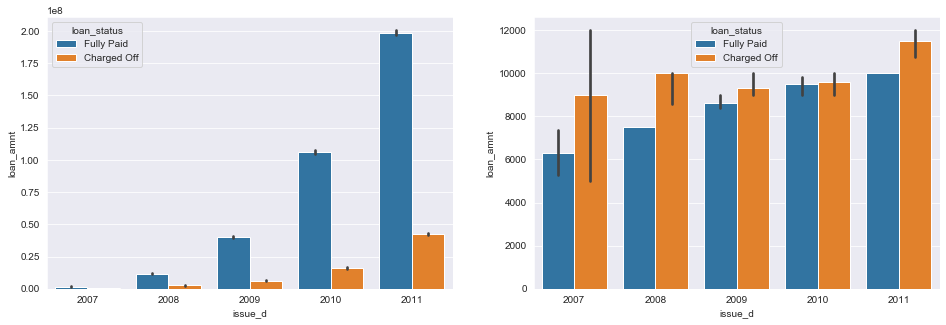

In [94]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
sns.barplot(x=pd.DatetimeIndex(data['issue_d']).year, y='loan_amnt', hue="loan_status", data=data, estimator=np.sum)
plt.subplot(1, 2, 2)
sns.barplot(x=pd.DatetimeIndex(data['issue_d']).year, y='loan_amnt', hue="loan_status", data=data, estimator=np.median)
plt.show()

**Observation:**

- Number of loans issued has increased with time
- Average loan amount had gone down after the 2008 recession but substantially increased towards later period
- The total sum of loans being charged off has increased every year but it has always remained less than fully paid loans

---
####  loan_amnt and annual_inc

<Figure size 1152x360 with 0 Axes>

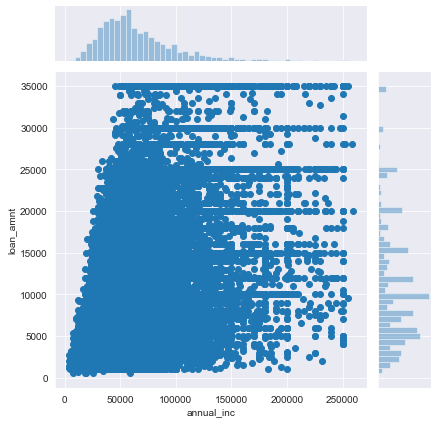

In [95]:
plt.figure(figsize=(16,5))
sns.jointplot('annual_inc', 'loan_amnt', data.loc[data['annual_inc']<260000])
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade vs loan_status

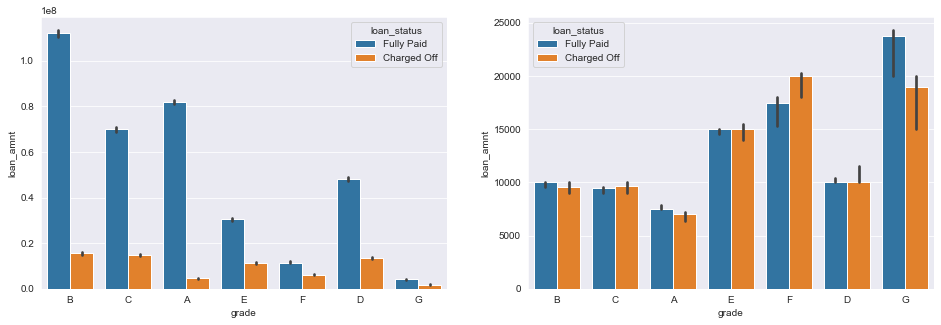

In [96]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=data, estimator=np.sum)
plt.subplot(1, 2, 2)
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=data, estimator=np.median)
plt.show()

 **Observation:**
 -  Larger loans generally appear to be given a lower grade

---
#### loan_amnt vs verification_status vs loan status

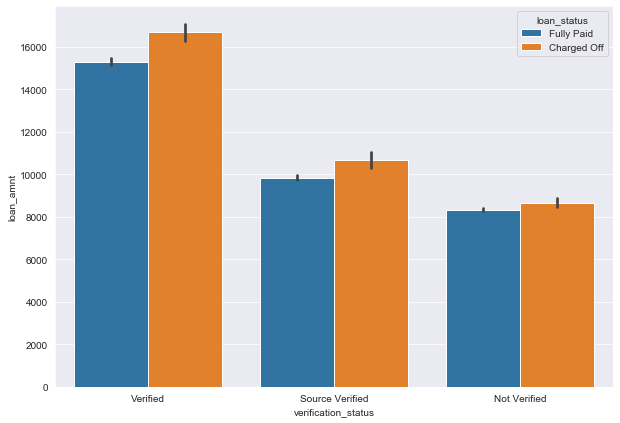

In [97]:
plt.figure(figsize=(10,7))
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=data, estimator=np.mean)
plt.show()

**Observation:**
- From the above it is evident that verification status is not a precditor for loan default

---
#### Interest Rate and Term

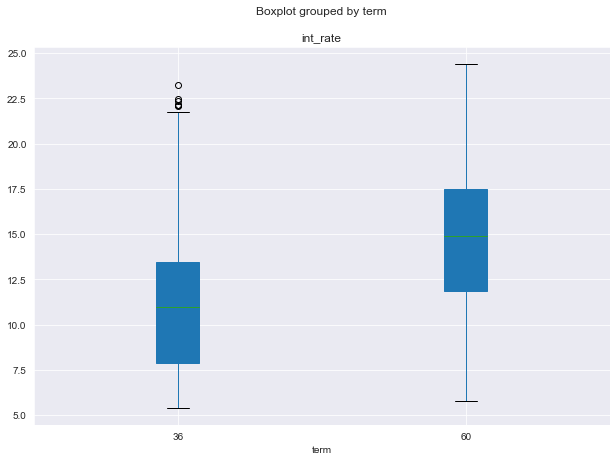

In [98]:
data.boxplot(column='int_rate', by='term', patch_artist=True, figsize=(10,7))
plt.show()

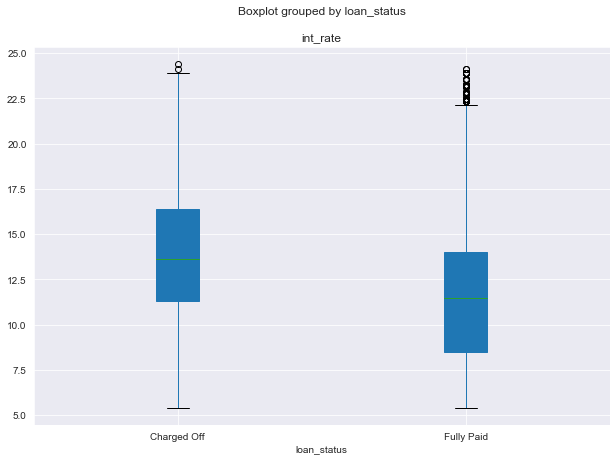

In [99]:
data.boxplot(column='int_rate', by='loan_status',patch_artist=True, figsize=(10,7))
plt.show()

#### Interest Rate vs Term vs Loan_status

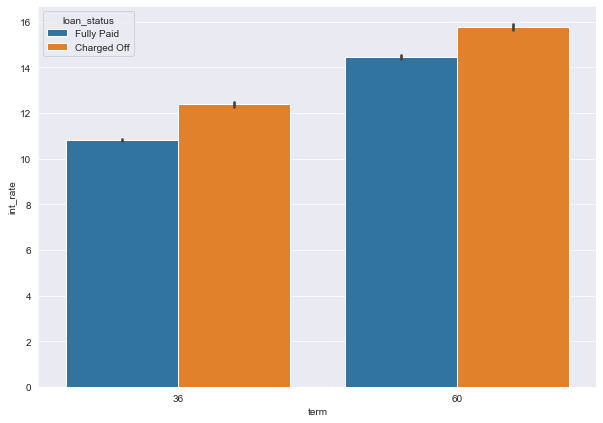

In [100]:
plt.figure(figsize=(10,7))
sns.barplot(x='term', y='int_rate', hue="loan_status", data=data, estimator=np.mean)
plt.show()

#### Interest Rate vs Loan Amount

<Figure size 720x504 with 0 Axes>

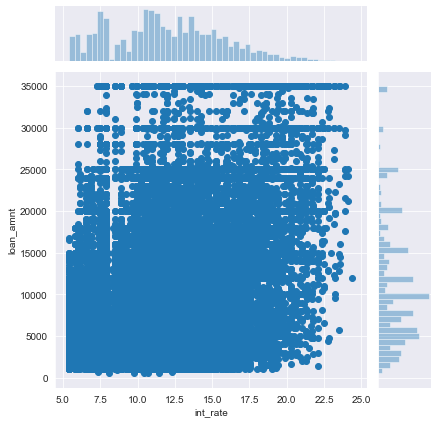

In [101]:
plt.figure(figsize=(10,7))
sns.jointplot('int_rate', 'loan_amnt', data)
plt.show()

**Observation:**
-  On an average, the interest rate is high for longer term. 
- As we can see above, more loan defaults are seen for higher interest rates
- Similarly defaults are more for longer term

---
#### Interest Rate and Sub Grade

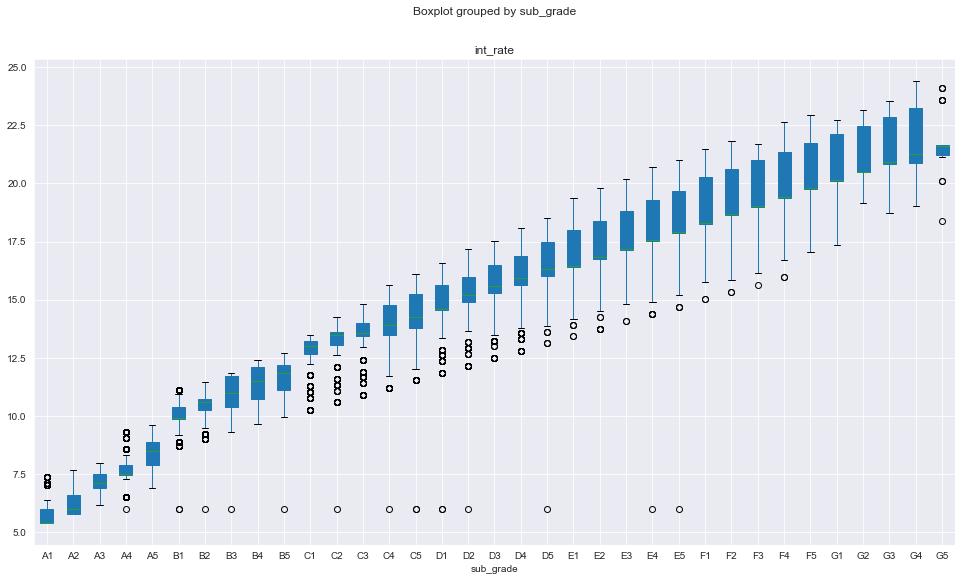

In [102]:
data.boxplot(column='int_rate', by='sub_grade',patch_artist=True, figsize=(16,9))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger the sub grade, higher are the rate of interest for the loan.

#### Loan amount vs Grade vs Term

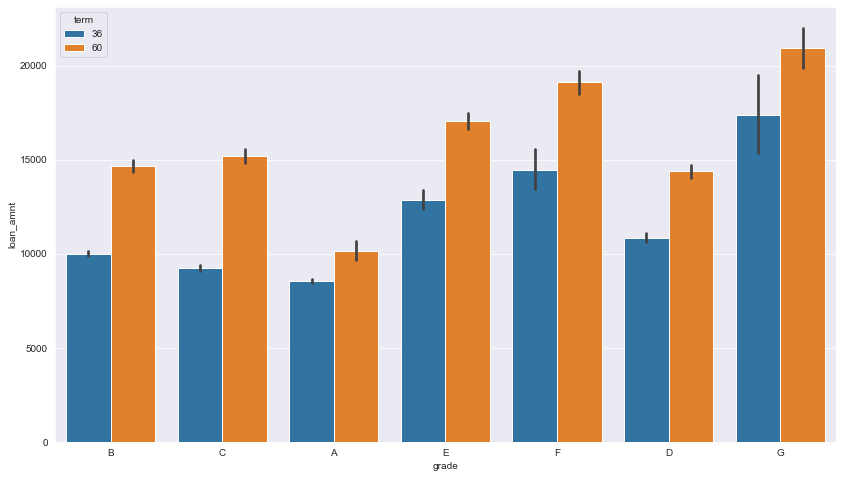

In [103]:
plt.figure(figsize=(14,8))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=data, estimator=np.mean)
plt.show()

**Observation:**
- Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


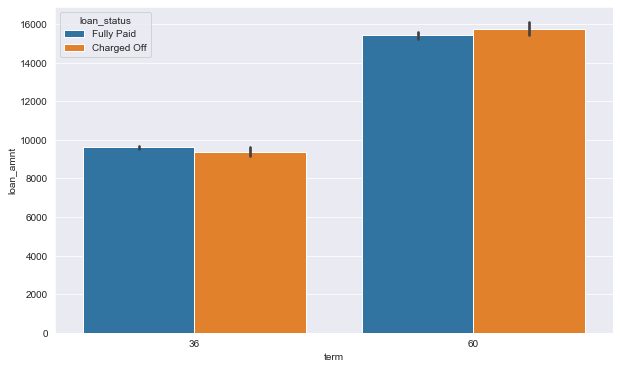

In [104]:
plt.figure(figsize=(10,6))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=data, estimator=np.mean)
plt.show()

**Observation:**
-  Higher loan amount are associated with longer terms and have more defaults


#### Loan amount Vs addr_state vs loan Status


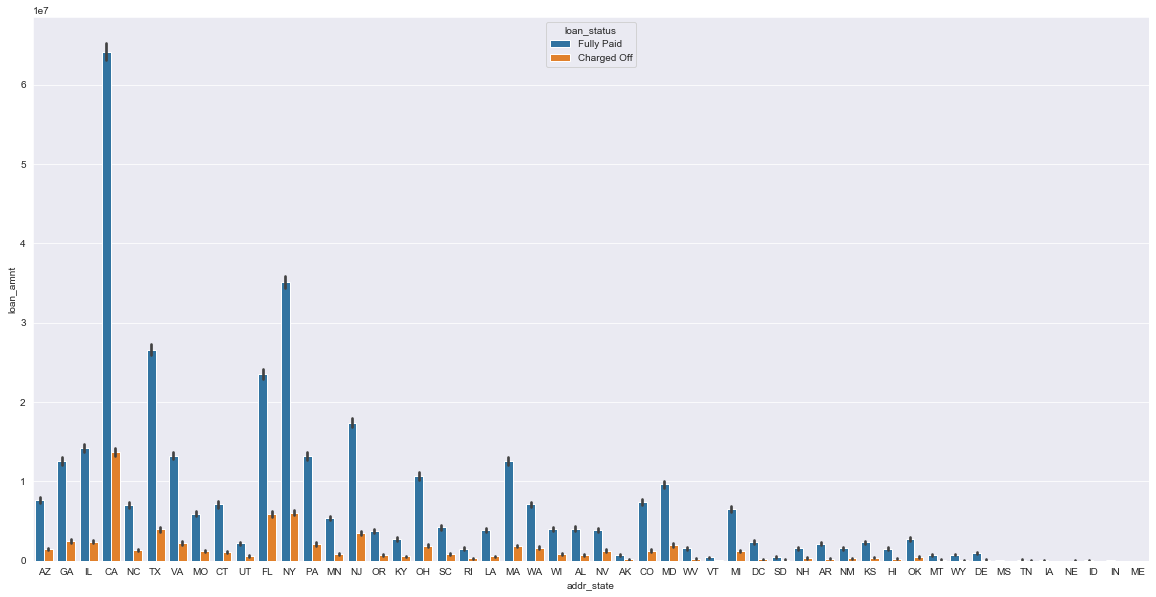

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=data, estimator = np.sum)
plt.show()

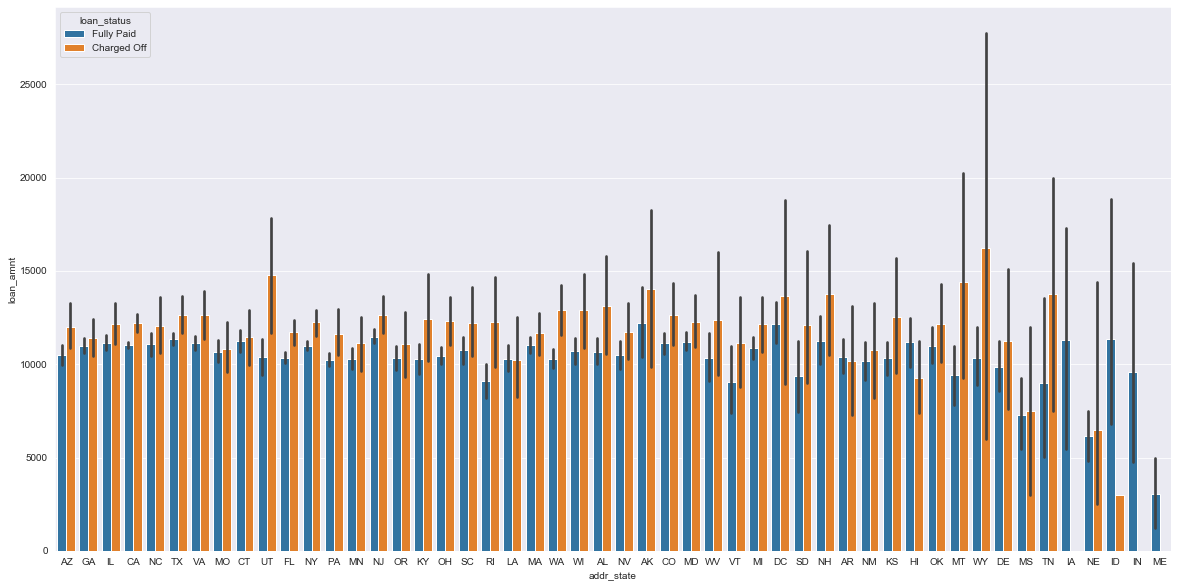

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=data, estimator = np.mean)
plt.show()

**Observation:**
-  Wyoming has the the highest average loan amount that was charged off. 
- California has the highest total amount fully paid & charged back

####  dti vs open_acc

In [107]:
# Create a new column to bin the dti
data['dti_bin'] = pd.cut(data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

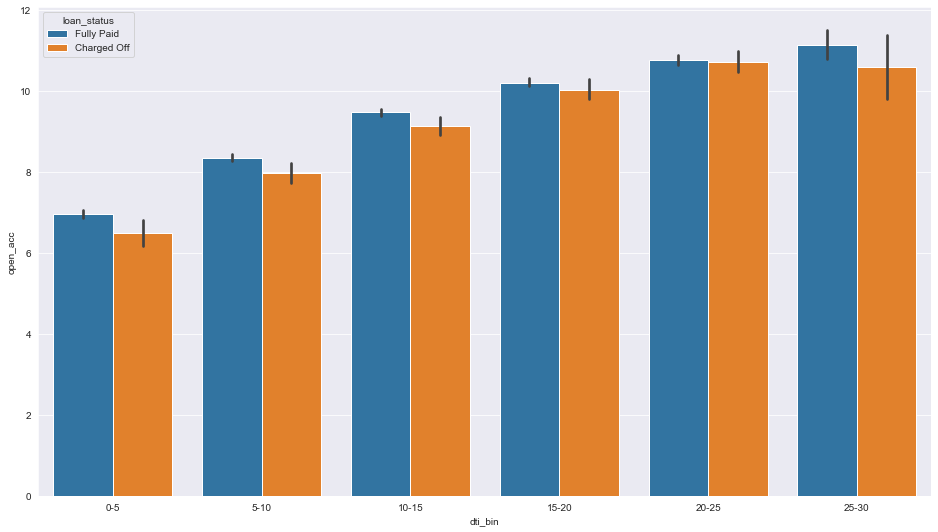

In [108]:
plt.figure(figsize=(16,9))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=data, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

####  delinq_2yr VS loan amount VS grade

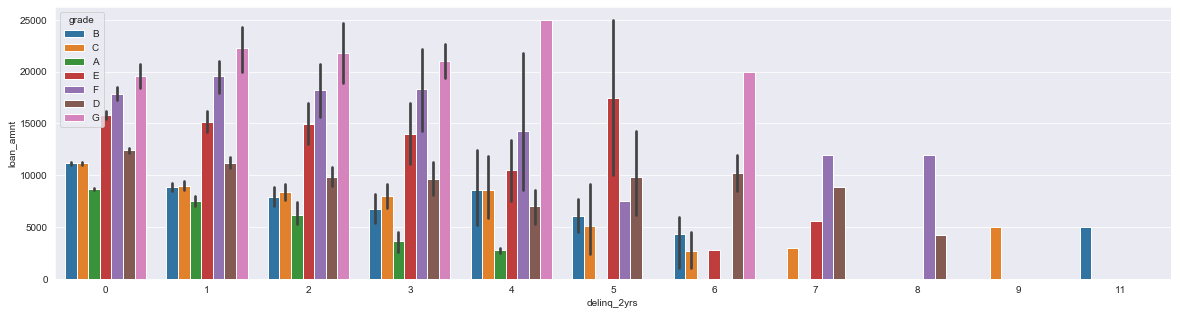

In [109]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=data, estimator=np.mean)
plt.show()

####  delinq_2yr VS int_rate  VS loan_status

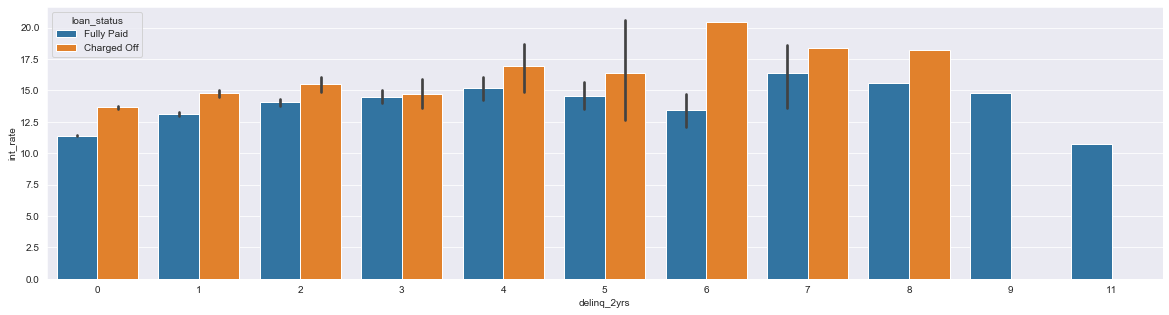

In [110]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=data, estimator=np.mean)
plt.show()

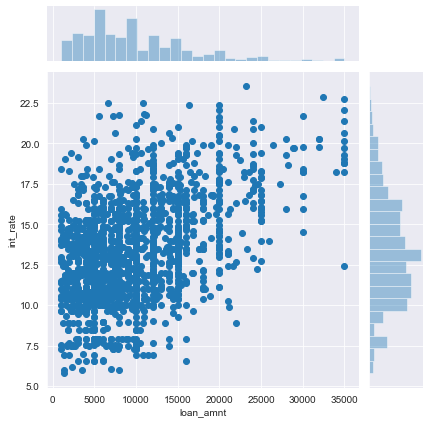

In [111]:
sns.jointplot('loan_amnt', 'int_rate', data.loc[data.pub_rec_bankruptcies > 0])

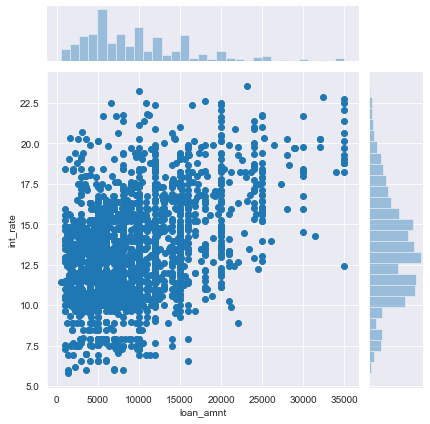

In [112]:
sns.jointplot('loan_amnt', 'int_rate', data.loc[data.pub_rec > 0])

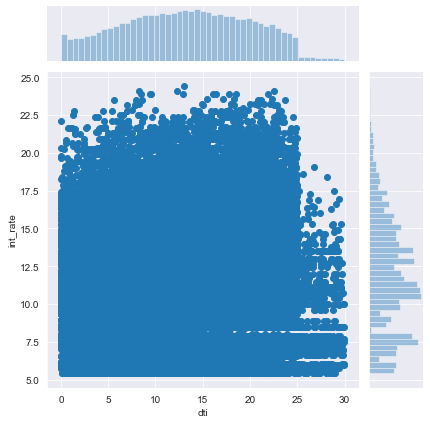

In [113]:
sns.jointplot('dti', 'int_rate', data)

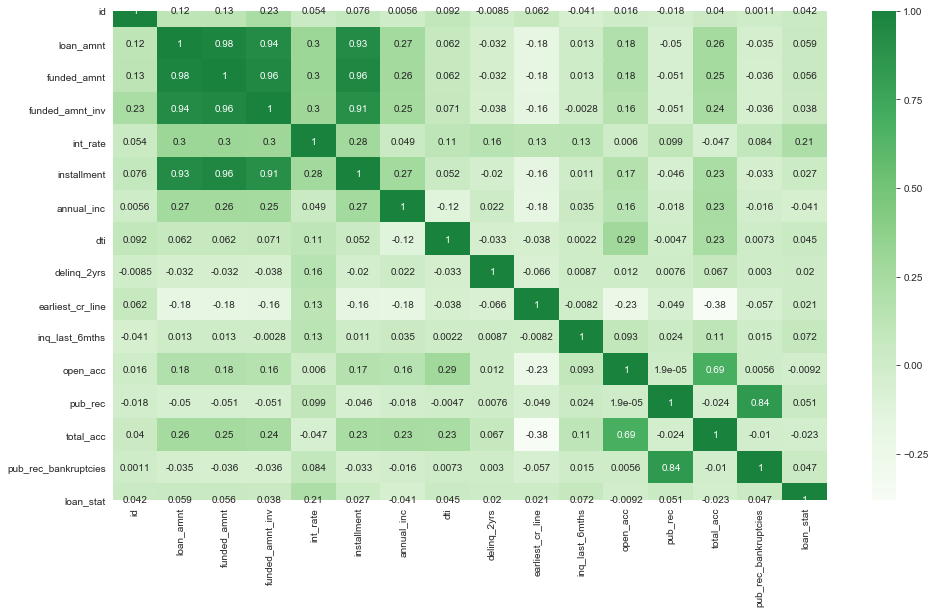

In [114]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, center=0.5, cmap="Greens")

### Dti VS Annual Income VS Loan Status

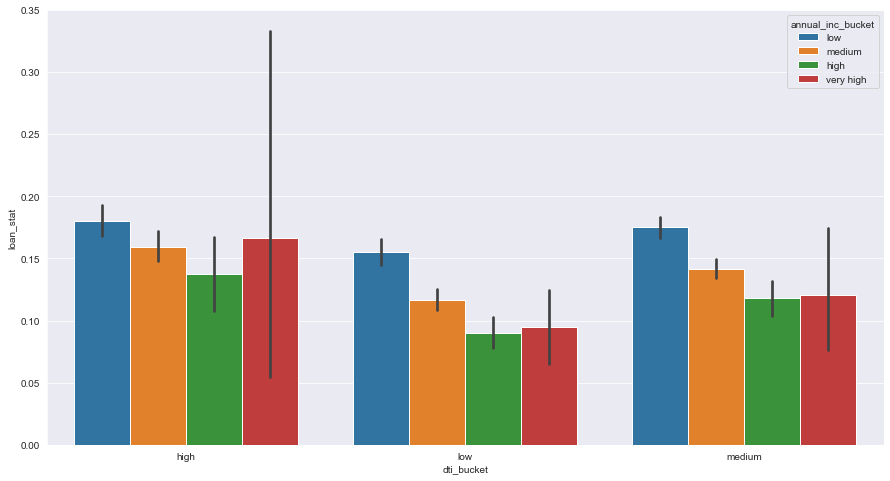

In [115]:
plt.figure(figsize=(15,8))
sns.barplot(x='dti_bucket',y='loan_stat',hue='annual_inc_bucket',data=data)
plt.show()

### Observations:
- Default rate increases with increase in dti irrespective of income.  
- However if income increases default rate decreases for same dti level.

### Dti VS Interest Rate VS Loan Status

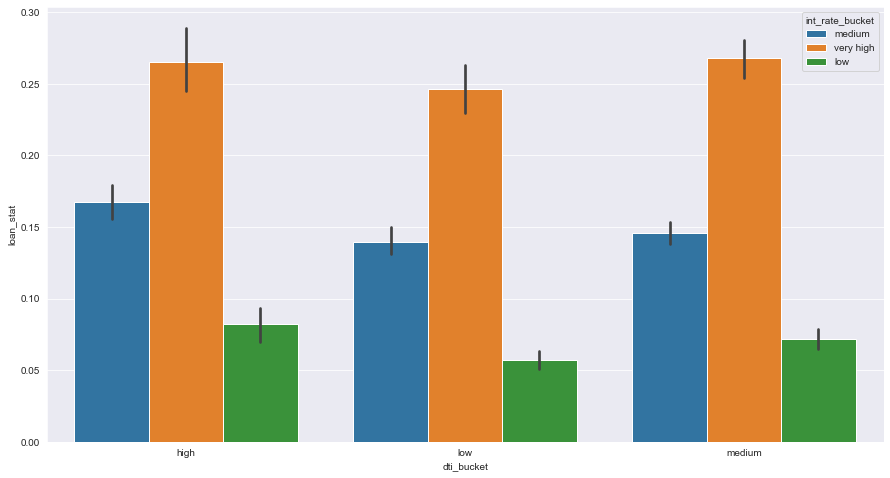

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(x='dti_bucket',y='loan_stat',hue='int_rate_bucket',data=data)
plt.show()

#### Observation:
- For same dti level higher the interest rate higher is default rate.

### Annual Income vs Interest Rate vs Loan Status

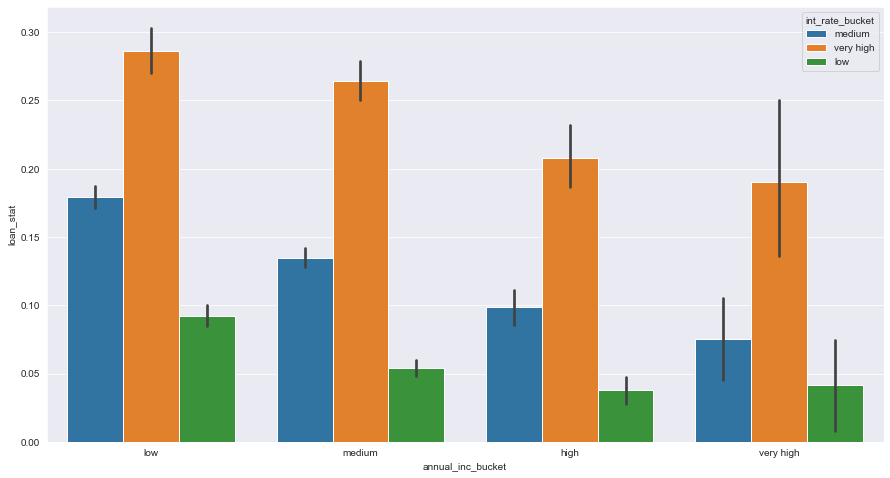

In [117]:
plt.figure(figsize=(15,8))
sns.barplot(x='annual_inc_bucket',y='loan_stat',hue='int_rate_bucket',data=data)
plt.show()

### Observation:
- As income increases percentage of charged off loans decreases.
- for same income level default rate always increase with increase in interest rate.

### Recommendations:
- Higher **Loan Amount** , **Interest Rate** and **Term** are risky.Therefore people who are borrowing loans at large amount or large interest rate or higher tenure has high percentage of defaulting.
- People who **don't Discloses** their employee title has higher defaulting rate.
- People with **Other** home ownership are most risky.
- People who have **lower annual income** are most risky. As income increases default rate decreses.
- People with **high Debt to income ratio** have highest default rate.
- People who have **more number of past-due delinquency** in their credit file for last 2 years has higher chances of defaulting the loan.
- People who inquired about the loan **more than once in last 6 months** has higher default rate.

#### These are few major recommendations to follow before approving for loan. Other key points that should be kept in mind while approving loan are like people with low income borrowing at high interest rate or at high tenure are very risky, people who have high debt to income ratio and low annual income have very high default rate. 